<a href="https://colab.research.google.com/github/ianmorgan11/CS-330/blob/master/simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

get the data
```
# This is formatted as code
```



In [4]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"


--2024-07-17 02:55:18--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-07-17 02:55:18--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-07-17 02:55:18 (1.13 GB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [7]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


Visualize the data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

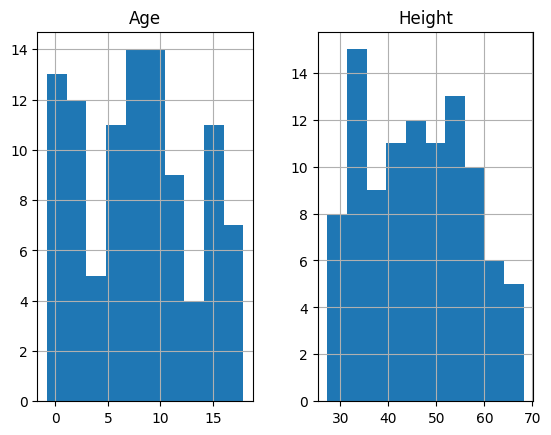

In [8]:
raw_data.hist()

In [9]:
raw_data.describe() #has negative age ... not good

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [14]:
#fix the data
clean_data = raw_data[raw_data['Age'] > 0]
clean_data.describe() #no longer has a min lower than zero


,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

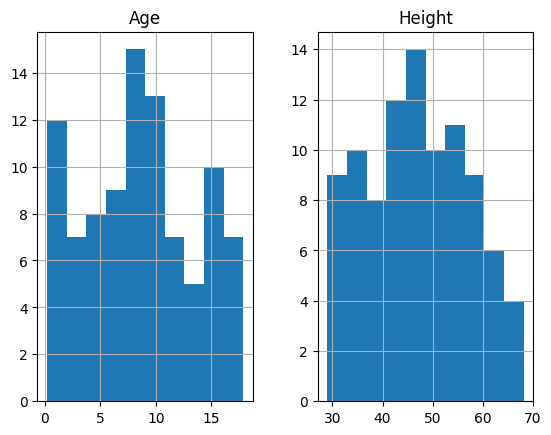

In [15]:
clean_data.hist()


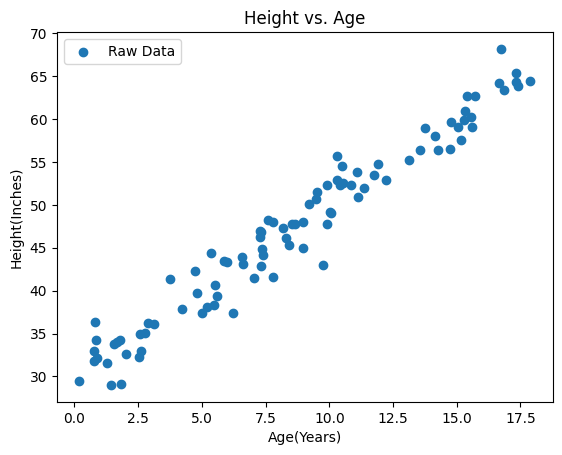

In [19]:
import matplotlib.pyplot as plt
ages = clean_data['Age']
heights = clean_data['Height']
plt.scatter(ages, heights, label='Raw Data')
plt.title('Height vs. Age')
plt.xlabel('Age(Years)')
plt.ylabel('Height(Inches)')
plt.legend()



Build the model, and train it
y = alpha + beta * x + epsilon #epsilon allows for the deviation from straight line
y_hat = alpha + beta * x #since this is the best guess if epsilon = 0

In [42]:
parameters = {'alpha':40, 'beta':4}
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age
y_hat(5, parameters)

60

In [51]:
def learn_parameters(data, params):
  x, y = data['Age'], data['Height']
  x_bar = x.mean()
  y_bar = y.mean()
  x = x.to_numpy()
  y = y.to_numpy()
  beta = sum( (x - x_bar) * (y - y_bar)) / sum( (x - x_bar) ** 2)
  alpha = y_bar - beta * x_bar
  params['alpha'] = alpha
  params['beta'] = beta



In [56]:
new_parameters = {'alpha':0, 'beta':0}
learn_parameters(clean_data, new_parameters)
new_parameters

{'alpha': 29.961857614615834, 'beta': 2.001416898910631}

In [61]:
spaced_ages = list(range(18))
spaced_untrained = [y_hat(x, parameters) for x in spaced_ages]
spaced_untrained


[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108]

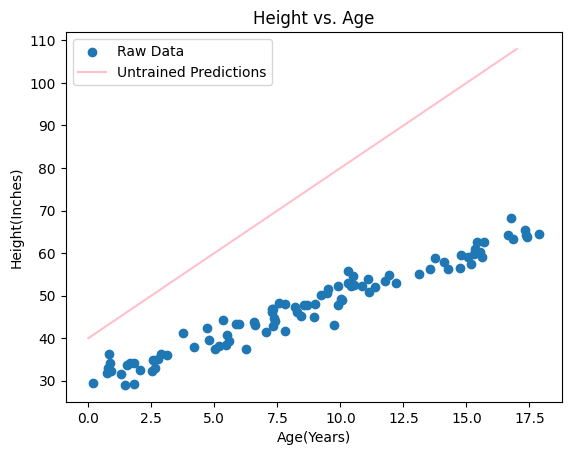

In [66]:

ages = clean_data['Age']
heights = clean_data['Height']
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained, label='Untrained Predictions', color = 'pink')
plt.title('Height vs. Age')
plt.xlabel('Age(Years)')
plt.ylabel('Height(Inches)')
plt.legend()

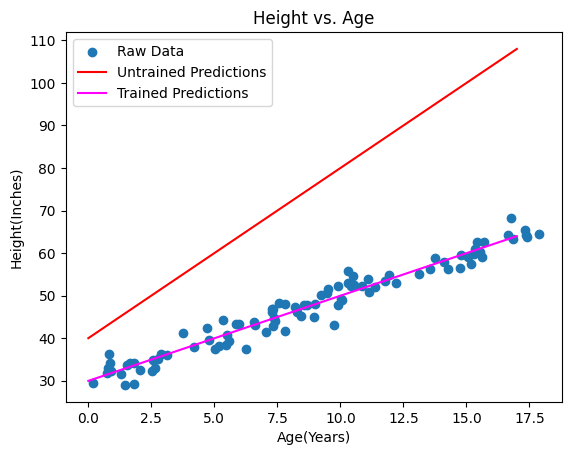

In [70]:
spaced_trained = [y_hat(x, new_parameters) for x in spaced_ages]
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained, label='Untrained Predictions', color = 'red')
plt.plot(spaced_ages, spaced_trained, label='Trained Predictions', color = 'magenta')
plt.title('Height vs. Age')
plt.xlabel('Age(Years)')
plt.ylabel('Height(Inches)')
plt.legend()

Use the model --- make predictions on unseen data

In [74]:
new_age = 20
y_hat(new_age, new_parameters)

69.99019559282846